In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.Load the dataset

In [9]:
data=pd.read_csv(r'C:\Users\RASHEED\WORK SHEET OF PYTHON\titanic_dataset.csv')


In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.Passenger ID as the index column

In [11]:
data=pd.read_csv(r'C:\Users\RASHEED\WORK SHEET OF PYTHON\titanic_dataset.csv',index_col='PassengerId')

In [12]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3.Basic details of the dataset

In [13]:
data.shape

(891, 11)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [17]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
>The data consist of 891 rows and 11 columns with passengerID as index column.
>The data contains integet,float and categorical data as it's values.
>The columns Age,Cabin and Embarked has missing values 177,687 and 2 respectively.
>The describe() function gives the statistical view of the data ie, mean,std,min and max value also column wise quartiles. 

4.Filling the missing values present in the dataset

In [18]:
#to know the data types
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

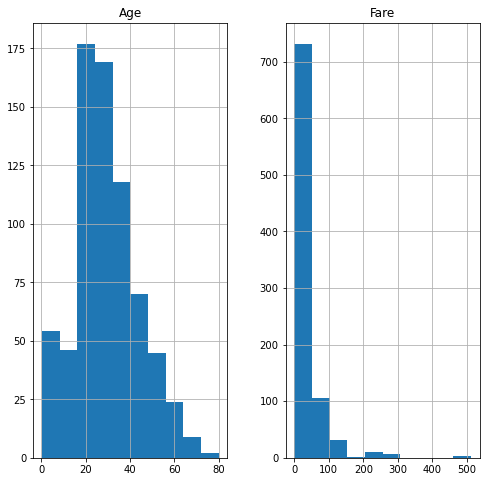

In [19]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(8,8))
plt.show()

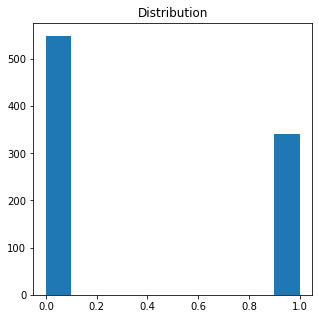

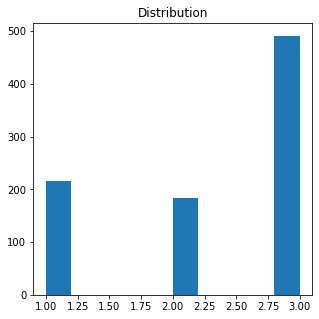

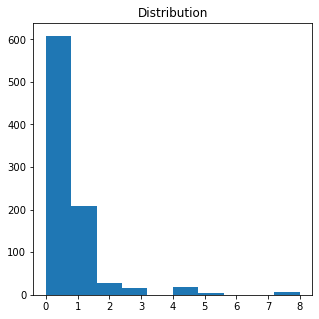

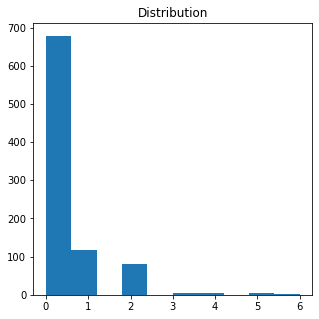

In [20]:
for i in ['Survived','Pclass','SibSp','Parch']:
    plt.figure(figsize=(5,5))
    plt.hist(data[i])
    plt.title('Distribution')
    plt.xticks()
    plt.yticks()

In [ ]:
>From the histogram of integer and float type variables such as age,fare,Survived,Pclass,SibSp and Parch it clear that the 
 variables age and fare is only continuous and the other variables are discrete type .
>The histogram of age and fare is right skewed or positively skewed.
>Since the feature age contains missing values we can fill the missing values by using the median of that particular column. 

In [21]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [22]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [23]:
# use for loop to fill the missing values of columns 'Cabin','Embarked'.Since these are categorical data we can fill the 
# missing values by mode

for i in ['Cabin','Embarked']:
    data[i]=data[i].fillna(data[i].mode())

In [24]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       686
Embarked      2
dtype: int64

In [25]:
data.Cabin.nunique()

147

5. Check and handle outliers in at least 3 columns in the dataset

In [26]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Box plot of Survived')

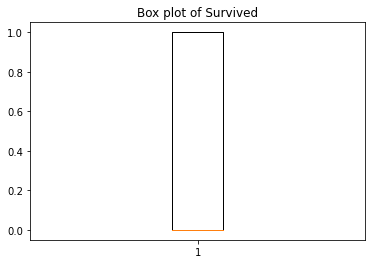

In [27]:
plt.boxplot(data['Survived'])
plt.title('Box plot of Survived')

Text(0.5, 1.0, 'Box plot of Pclass')

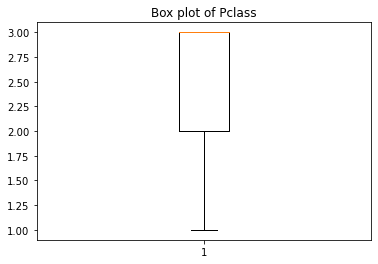

In [28]:
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

Text(0.5, 1.0, 'Box plot of Age')

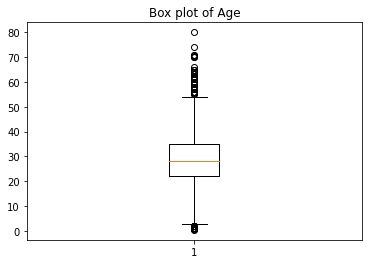

In [29]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of SibSp')

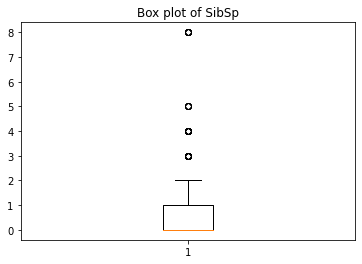

In [30]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

Text(0.5, 1.0, 'Box plot of Parch')

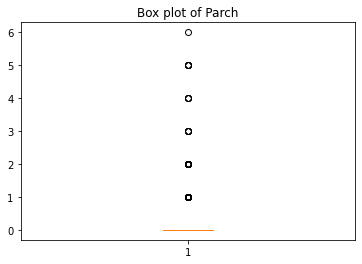

In [31]:
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')

Text(0.5, 1.0, 'Box plot of Fare')

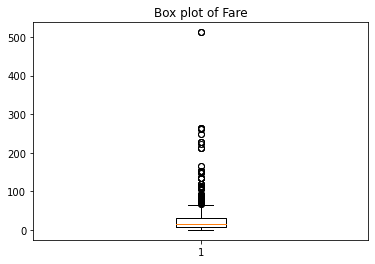

In [32]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

>From the Boxplot of variables such as survived,Pclass,age,sibsp,parch and fare we can see that only four of them has outliers
 ie, the variables age,sibsp,parch and fare is dealing with outliers.
>Here we have to handle outliers of atleast 3 columns so we consider columns of age, sibsp and fare

In [33]:
#removing outliers of the variable age
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

22.0 28.0 35.0


In [34]:
data['Age'].median()

28.0

In [35]:
#to find th IQR
IQR=Q3-Q1
IQR

13.0

In [36]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim,up_lim)

2.5 54.5


In [37]:
outlier=[]
for x in data['Age']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [38]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [39]:
#locating the index of outlier values
ind1=data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [40]:
#droping those values using their index position
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 
           493, 494, 546,556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,830, 852, 880],inplace=True)

Text(0.5, 1.0, 'Boxplot of Age')

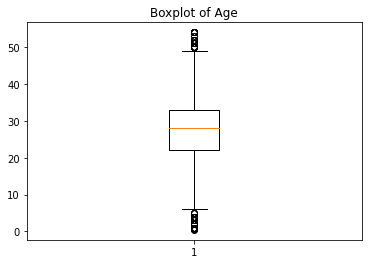

In [41]:
#checking again whether the outliers are reduced using boxplot
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')

In [42]:
#removing outliers of the variable sibsp
Q4=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q5=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q6=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q4,Q5,Q6)

0.0 0.0 1.0


In [43]:
data['SibSp'].median()

0.0

In [44]:
#to find th IQR
IQR=Q6-Q4
IQR

1.0

In [45]:
low_lim=Q4-1.5*IQR
up_lim=Q6+1.5*IQR
print(low_lim,up_lim)

-1.5 2.5


In [46]:
outlier=[]
for x in data['SibSp']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [47]:
#locating the index of outlier values
ind2=data['SibSp']>up_lim
data.loc[ind2].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [48]:
#droping those values using their index position
data.drop([8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 
          325, 342,375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,793, 814, 820, 825, 847, 851, 864],
          inplace=True)

Text(0.5, 1.0, 'Boxplot of SibSp')

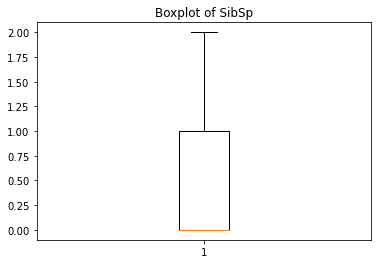

In [49]:
#checking again whether the outliers are reduced using boxplot
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp')

In [50]:
Q7=np.percentile(data['Fare'],25,interpolation='midpoint')
Q8=np.percentile(data['Fare'],50,interpolation='midpoint')
Q9=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q7,Q8,Q9)

7.8958 13.0 27.825


In [51]:
data['Fare'].median()

13.0

In [52]:
IQR=Q9-Q7
round(IQR,3)

19.929

In [53]:
low_lim=Q7-1.5*IQR
up_lim=Q9+1.5*IQR
print(round(low_lim,2),round(up_lim,2))

-22.0 57.72


In [54]:
outlier=[]
for x in data['Fare']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [55]:
ind3=data['Fare']>up_lim
data.drop(data.loc[ind3].index,inplace=True)

Text(0.5, 1.0, 'Boxplot of Fare')

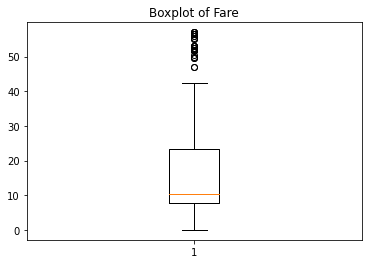

In [56]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')

> While comparing boxplot of  Age,Sibsp and Fare we can see that the outliers are reduced.

In [57]:
#check the shape of data after dropping te outliers
data.shape

(699, 11)

6.Do min max scaling on the feature set (Take ‘Survived’ as target)

<AxesSubplot:>

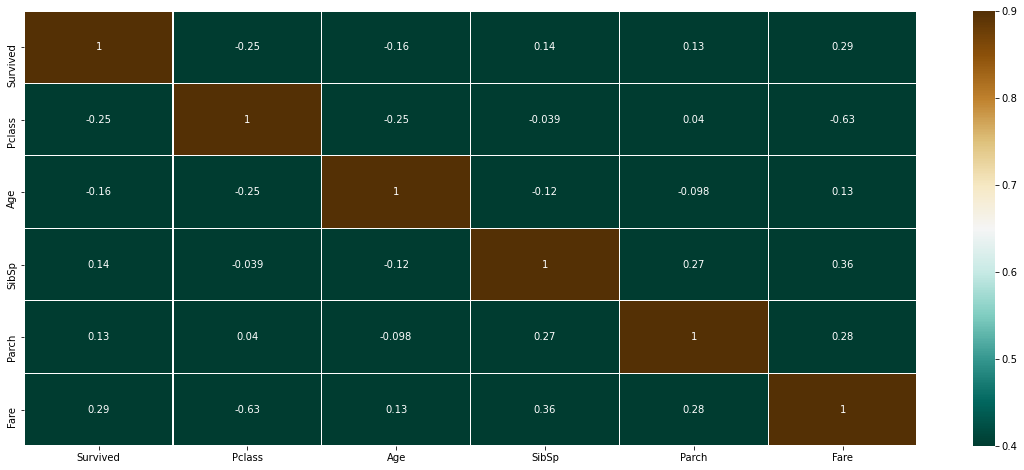

In [58]:
#we can plot heatmap to know the correlation of the variables
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='BrBG_r')

> here we can observe that there exist low correlation between the variables.

In [59]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [60]:
x=data.drop(['Name','Survived','Sex','Ticket','Cabin','Embarked'],axis=1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,2.505007,28.023247,0.283262,0.288984,16.407015
std,0.710878,10.150850,0.513310,0.764193,12.559295
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.877100
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,32.750000,1.000000,0.000000,23.250000
max,3.000000,54.000000,2.000000,6.000000,57.000000


In [61]:
type(x)

pandas.core.frame.DataFrame

In [62]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [63]:
x=min_max.fit_transform(x)
x

array([[1.        , 0.40276222, 0.5       , 0.        , 0.12719298],
       [1.        , 0.47741695, 0.        , 0.        , 0.13903509],
       [0.        , 0.64539007, 0.5       , 0.        , 0.93157895],
       ...,
       [1.        , 0.51474431, 0.5       , 0.33333333, 0.41140351],
       [0.        , 0.47741695, 0.        , 0.        , 0.52631579],
       [1.        , 0.58939903, 0.        , 0.        , 0.13596491]])

In [64]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.752504,0.515178,0.141631,0.048164,0.287842
std,0.355439,0.189452,0.256655,0.127365,0.220339
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.402762,0.000000,0.000000,0.138195
50%,1.000000,0.514744,0.000000,0.000000,0.184211
75%,1.000000,0.603397,0.500000,0.000000,0.407895
max,1.000000,1.000000,1.000000,1.000000,1.000000


>While comparing the describing function the range of the variable is changed to 0 and 1.

In [73]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [71]:
#to check linear regression model
y=data['Survived']
x=data.drop(['Name','Survived','Sex','Ticket','Cabin','Embarked'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [74]:
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.18671392201028233
R squared value is: 0.20026379558532925


In [ ]:
> Here MSE is obtained as 0.1867 and R2 value is 0.2002